In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


Ini pakai file yang cleaned_final_label

In [16]:
df = pd.read_csv("C:\\Users\\thebl\\Documents\\Lomba\\SatDat2024\\FullSenyum-SatriaData2024\\DataSet\\df_sejauh ini_richard.csv")
df

,label,text,check_lupa_spasi
0,Sumber Daya Alam,kunjung prabowo resmi serah proyek bantu air b...,False
1,Politik,anies tepuk tangan riah rektor wajib mata kuli...,False
2,Demografi,memang benar dukung anies dukung prabowo hanya...,False
3,Politik,anies sikap kritis kerja prabowo anggap tidak ...,False
4,Politik,anies baswedan harap asn masuk tni polri pegan...,False
...,...,...,...
4255,Politik,ngeliat debat kemarin prabowo kicep keluarga l...,False
4256,Politik,masyarakat prabowogibran milik visi jalan aspi...,False
4257,Ekonomi,imo both are irrational but irrational tbh but...,False
4258,Pertahanan dan Keamanan,look at that ganjar kecimpung lgislatif ekseku...,False


In [18]:
df['label_angka'] = df.label.map({
    'Politik' : 0,
    'Sosial Budaya'  : 1,
    'Ideologi' : 2,
    'Pertahanan dan Keamanan' : 3,
    'Ekonomi' : 4,
    'Sumber Daya Alam' : 5,
    'Demografi' : 6,
    'Geografi' : 7
})
df.head()

,label,text,check_lupa_spasi,label_angka
0,Sumber Daya Alam,kunjung prabowo resmi serah proyek bantu air b...,False,5
1,Politik,anies tepuk tangan riah rektor wajib mata kuli...,False,0
2,Demografi,memang benar dukung anies dukung prabowo hanya...,False,6
3,Politik,anies sikap kritis kerja prabowo anggap tidak ...,False,0
4,Politik,anies baswedan harap asn masuk tni polri pegan...,False,0


In [ ]:
df['label'].value_counts()

label
Politik                    2952
Sosial Budaya               419
Ideologi                    339
Pertahanan dan Keamanan     330
Ekonomi                     309
Sumber Daya Alam            154
Demografi                    60
Geografi                     20
Name: count, dtype: int64

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.text,
    df.label_angka,
    test_size=0.2,
    random_state=42,
    stratify=df.label_angka
)

NameError: name 'df' is not defined

Try SmoteBorderline + complementNB

In [1]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=102)),
    ('Multi NB', MultinomialNB())
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'X_train' is not defined

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       576
           1       0.50      0.32      0.39        88
           2       0.50      0.30      0.37        47
           3       0.69      0.55      0.61        49
           4       0.72      0.67      0.70        58
           5       0.33      0.29      0.31        17
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         7

    accuracy                           0.74       857
   macro avg       0.44      0.38      0.40       857
weighted avg       0.70      0.74      0.71       857

Balanced Accuracy: 0.38
Confusion Matrix:
 [[521  16  13  10  10   5   1   0]
 [ 57  28   1   0   2   0   0   0]
 [ 29   1  14   1   2   0   0   0]
 [ 18   2   0  27   1   1   0   0]
 [ 13   2   0   0  39   4   0   0]
 [  8   2   0   1   0   5   1   0]
 [ 12   3   0   0   0   0   0   0]
 [  5   2   0   0   0   0   0   0]]


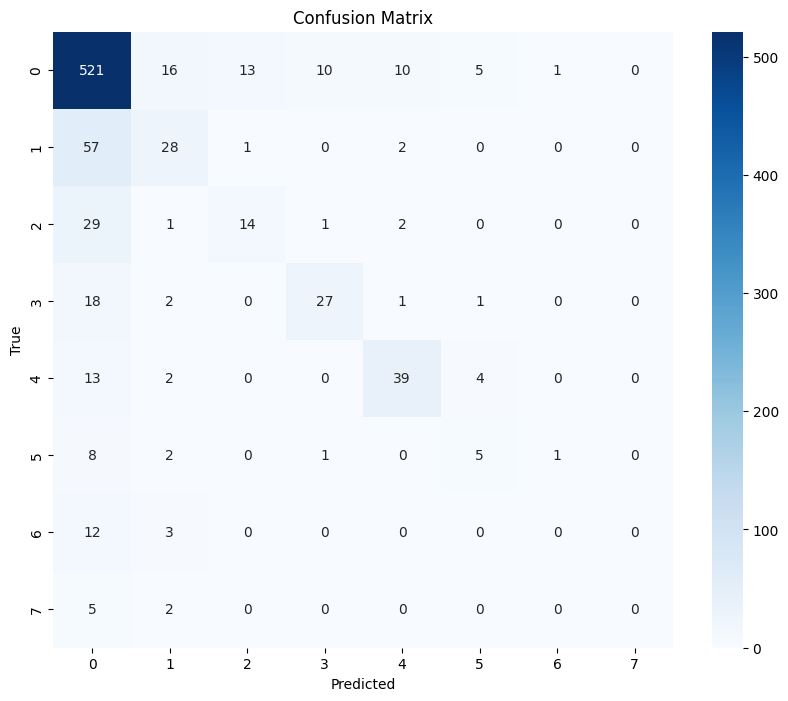

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SVMSMOTE
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('SVM_smote', SVMSMOTE(random_state=102)),
    ('svc', SVC(kernel='linear'))
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.76      0.73      0.75       576
           1       0.26      0.22      0.23        88
           2       0.20      0.30      0.24        47
           3       0.48      0.49      0.48        49
           4       0.50      0.60      0.55        58
           5       0.11      0.18      0.14        17
           6       0.08      0.07      0.07        15
           7       0.00      0.00      0.00         7

    accuracy                           0.60       857
   macro avg       0.30      0.32      0.31       857
weighted avg       0.62      0.60      0.61       857

Balanced Accuracy: 0.32
Confusion Matrix:
 [[421  38  47  20  27  15   7   1]
 [ 48  19   5   3   3   5   4   1]
 [ 30   1  14   2   0   0   0   0]
 [ 18   3   1  24   1   2   0   0]
 [ 13   6   2   1  35   1   0   0]
 [  8   3   0   0   3   3   0   0]
 [  9   3   0   0   1   0   1   1]
 [  5   1   0   0   0   1   0   0]]


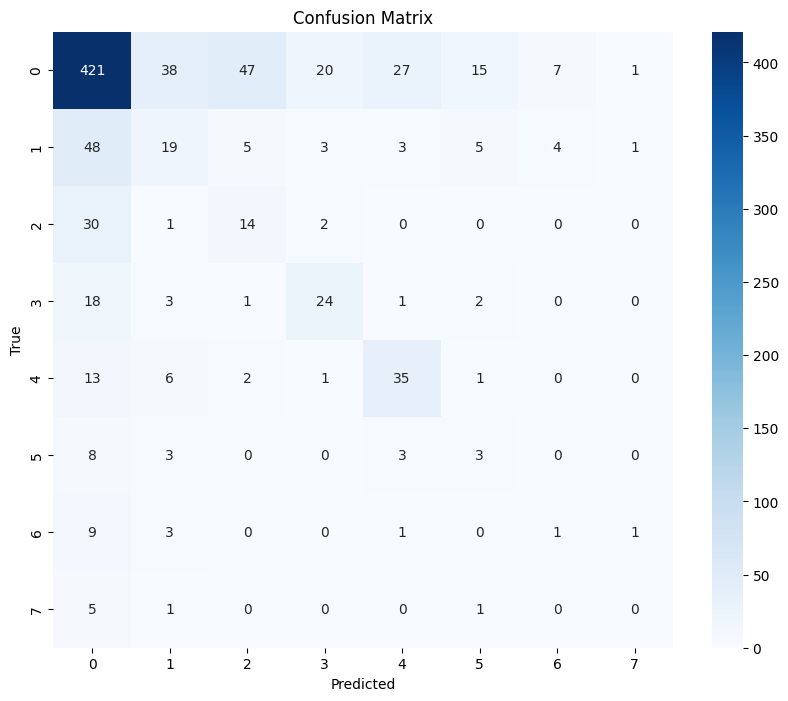

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=102)),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=102)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       620
           1       0.35      0.57      0.43        74
           2       0.57      0.43      0.49        76
           3       0.56      0.67      0.61        57
           4       0.63      0.65      0.64        52
           5       0.38      0.55      0.45        20
           6       0.17      0.15      0.16        13
           7       0.00      0.00      0.00         5

    accuracy                           0.70       917
   macro avg       0.44      0.48      0.45       917
weighted avg       0.72      0.70      0.71       917

Balanced Accuracy: 0.48
Confusion Matrix:
 [[483  56  21  24  19  10   6   1]
 [ 27  42   1   3   0   1   0   0]
 [ 33   6  33   1   0   1   2   0]
 [ 13   4   0  38   0   0   2   0]
 [  9   5   1   1  34   2   0   0]
 [  5   3   0   1   0  11   0   0]
 [  5   3   2   0   1   0   2   0]
 [  0   1   0   0   0   4   0   0]]


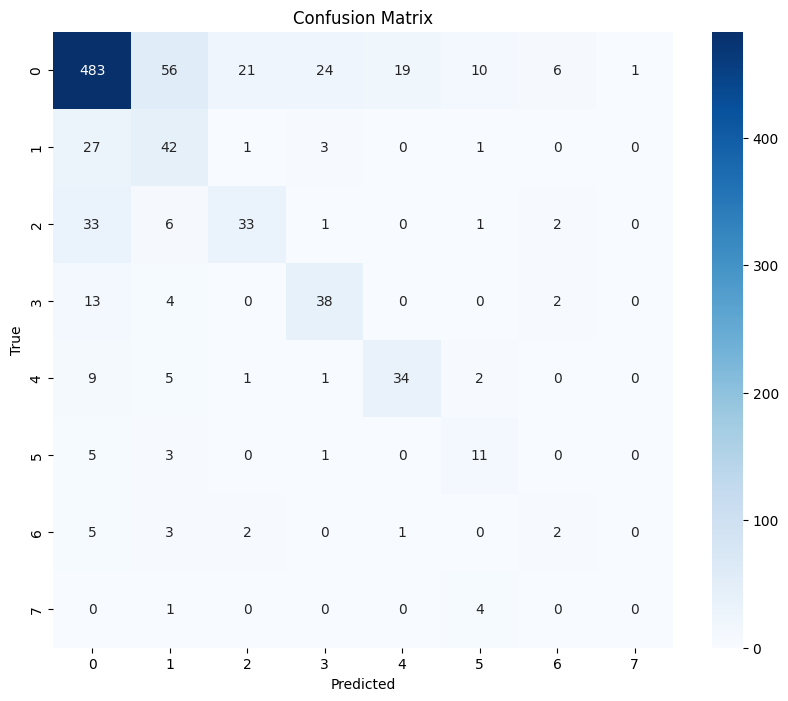

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=102)),
    ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [1]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan pipeline
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer(ngram_range=(1, 2))),
    ('smote', SMOTE(random_state=102)),
    ('ridge_classifier', RidgeClassifier(random_state=42))
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'X_train' is not defined

              precision    recall  f1-score   support

           0       0.86      0.56      0.68       620
           1       0.28      0.55      0.37        74
           2       0.45      0.49      0.47        76
           3       0.45      0.74      0.56        57
           4       0.36      0.65      0.47        52
           5       0.23      0.60      0.33        20
           6       0.15      0.38      0.21        13
           7       0.00      0.00      0.00         5

    accuracy                           0.56       917
   macro avg       0.35      0.50      0.38       917
weighted avg       0.70      0.56      0.60       917

Balanced Accuracy: 0.50
Confusion Matrix:
 [[347  83  41  45  52  27  18   7]
 [ 22  41   3   3   2   2   1   0]
 [ 16   9  37   3   4   1   5   1]
 [  5   4   1  42   0   2   2   1]
 [  4   3   1   1  34   6   2   1]
 [  4   2   0   0   1  12   1   0]
 [  4   3   0   0   1   0   5   0]
 [  0   2   0   0   0   3   0   0]]


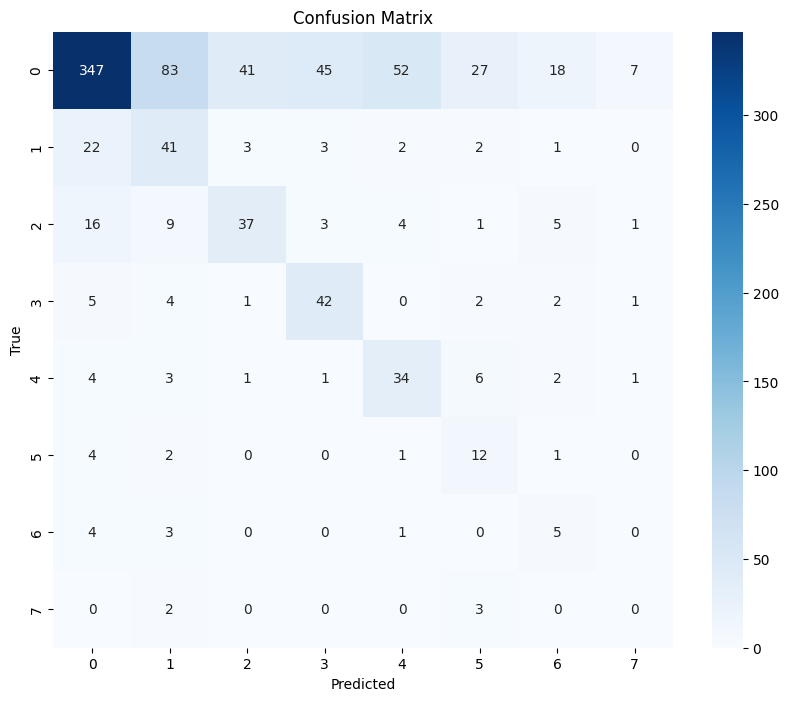

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),  # Oversampling dengan SMOTE
    ('under_sampler', RandomUnderSampler(random_state=42)),  # Undersampling dengan RandomUnderSampler
    ('Multi NB', MultinomialNB())
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



# Definisikan pipeline dengan kombinasi SMOTE dan RandomUnderSampler
clf = Pipeline([
    ('vectorizer_tfid', TfidfVectorizer()),
    ('smote', SMOTE(random_state=42)),  # Oversampling dengan SMOTE
    ('under_sampler', RandomUnderSampler(random_state=42)),  # Undersampling dengan RandomUnderSampler
    ('Multi NB', MultinomialNB())
])

# Fit model
clf.fit(X_train, y_train)

# Prediksi
y_pred = clf.predict(X_test)

# Evaluasi hasil
print(classification_report(y_test, y_pred))

balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy: {:.2f}".format(balanced_acc))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


TypeError: 'ellipsis' object is not iterable